In [1]:
from urllib.request import urlopen
import ssl
from bs4 import BeautifulSoup
ssl._create_default_https_context = ssl._create_unverified_context
#response = urllib.request.urlopen('https://www.python.org')

In [2]:
html = urlopen("https://www.oica.net/category/production-statistics/")
data = BeautifulSoup(html, 'lxml')
type(data)

bs4.BeautifulSoup

In [3]:
table_rows = data.findAll('tr')
table_rows

[<tr class="row-1 odd">
 <th class="column-1">Country/Region</th><th class="column-2">Cars</th><th class="column-3">Commercial vehicles</th><th class="column-4">Total</th><th class="column-5">% change</th>
 </tr>,
 <tr class="row-2 even">
 <td class="column-1">Argentina</td><td class="column-2">203700</td><td class="column-3">268458</td><td class="column-4">472158</td><td class="column-5">-0.13</td>
 </tr>,
 <tr class="row-3 odd">
 <td class="column-1">Australia</td><td class="column-2">88195</td><td class="column-3">10437</td><td class="column-4">98632</td><td class="column-5">-38.85</td>
 </tr>,
 <tr class="row-4 even">
 <td class="column-1">Austria</td><td class="column-2">81000</td><td class="column-3">18880</td><td class="column-4">99880</td><td class="column-5">-8.98</td>
 </tr>,
 <tr class="row-5 odd">
 <td class="column-1">Belgium</td><td class="column-2">336000</td><td class="column-3">43140</td><td class="column-4">379140</td><td class="column-5">-5.08</td>
 </tr>,
 <tr class

In [4]:
for row in table_rows:
    each_row = row.find_all('td')
    print(each_row)

[]
[<td class="column-1">Argentina</td>, <td class="column-2">203700</td>, <td class="column-3">268458</td>, <td class="column-4">472158</td>, <td class="column-5">-0.13</td>]
[<td class="column-1">Australia</td>, <td class="column-2">88195</td>, <td class="column-3">10437</td>, <td class="column-4">98632</td>, <td class="column-5">-38.85</td>]
[<td class="column-1">Austria</td>, <td class="column-2">81000</td>, <td class="column-3">18880</td>, <td class="column-4">99880</td>, <td class="column-5">-8.98</td>]
[<td class="column-1">Belgium</td>, <td class="column-2">336000</td>, <td class="column-3">43140</td>, <td class="column-4">379140</td>, <td class="column-5">-5.08</td>]
[<td class="column-1">Brazil</td>, <td class="column-2">2269468</td>, <td class="column-3">430204</td>, <td class="column-4">2699672</td>, <td class="column-5">25.2</td>]
[<td class="column-1">Canada</td>, <td class="column-2">749458</td>, <td class="column-3">1450331</td>, <td class="column-4">2199789</td>, <td c

In [5]:
lists_of_rows = []
for row in table_rows:
    each_row=row.findAll('td')
    str_row= str(each_row)
    row_text = BeautifulSoup(str_row, "lxml").get_text()
    lists_of_rows.append(row_text)
print(lists_of_rows)    

['[]', '[Argentina, 203700, 268458, 472158, -0.13]', '[Australia, 88195, 10437, 98632, -38.85]', '[Austria, 81000, 18880, 99880, -8.98]', '[Belgium, 336000, 43140, 379140, -5.08]', '[Brazil, 2269468, 430204, 2699672, 25.2]', '[Canada, 749458, 1450331, 2199789, -7.21]', '[China, 24806687, 4208747, 29015434, 3.19]', '[Czech Rep., 1413881, 6112, 1419993, 0]', '[Egypt, 9970, 26670, 36640, 1.13]', '[Finland, 91598, 0, 91598, 90.83]', '[France, 1748000, 479000, 2227000, 6.54]', '[Germany, 5645581, 0, 5645581, -1.76]', '[Hungary, 502000, 3400, 505400, -4.01]', '[India, 3952550, 830346, 4782896, 5.83]', '[Indonesia, 982356, 234259, 1216615, 3.3]', '[Iran, 1418550, 96846, 1515396, 18.19]', '[Italy, 742642, 399568, 1142210, 3.53]', '[Japan, 8347836, 1345910, 9693746, 5.31]', '[Malaysia, 424880, 35260, 460140, -15.62]', '[Morocco, 341802, 34484, 376826, 9]', '[Mexico, 1900029, 2168386, 4068415, 13]', '[Netherlands, 155000, 2280, 157280, 74.97]', '[Poland, 514700, 175029, 689729, 1.16]', '[Portuga

In [6]:
import re

motor_list = []
for row in table_rows:
    each_row = row.findAll('td')
    str_row = str(each_row)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_row))
    motor_list.append(clean2)
    print(clean2)
    type(clean2)

[]
[Argentina, 203700, 268458, 472158, -0.13]
[Australia, 88195, 10437, 98632, -38.85]
[Austria, 81000, 18880, 99880, -8.98]
[Belgium, 336000, 43140, 379140, -5.08]
[Brazil, 2269468, 430204, 2699672, 25.2]
[Canada, 749458, 1450331, 2199789, -7.21]
[China, 24806687, 4208747, 29015434, 3.19]
[Czech Rep., 1413881, 6112, 1419993, 0]
[Egypt, 9970, 26670, 36640, 1.13]
[Finland, 91598, 0, 91598, 90.83]
[France, 1748000, 479000, 2227000, 6.54]
[Germany, 5645581, 0, 5645581, -1.76]
[Hungary, 502000, 3400, 505400, -4.01]
[India, 3952550, 830346, 4782896, 5.83]
[Indonesia, 982356, 234259, 1216615, 3.3]
[Iran, 1418550, 96846, 1515396, 18.19]
[Italy, 742642, 399568, 1142210, 3.53]
[Japan, 8347836, 1345910, 9693746, 5.31]
[Malaysia, 424880, 35260, 460140, -15.62]
[Morocco, 341802, 34484, 376826, 9]
[Mexico, 1900029, 2168386, 4068415, 13]
[Netherlands, 155000, 2280, 157280, 74.97]
[Poland, 514700, 175029, 689729, 1.16]
[Portugal, 126426, 49118, 175544, 22.68]
[Romania, 359240, 10, 359250, -0.02]
[Rus

In [7]:
import pandas as pd
import numpy as np
import random

In [8]:
motor = pd.DataFrame(motor_list)
motor.head(10)

,0
0,[]
1,"[Argentina, 203700, 268458, 472158, -0.13]"
2,"[Australia, 88195, 10437, 98632, -38.85]"
3,"[Austria, 81000, 18880, 99880, -8.98]"
4,"[Belgium, 336000, 43140, 379140, -5.08]"
5,"[Brazil, 2269468, 430204, 2699672, 25.2]"
6,"[Canada, 749458, 1450331, 2199789, -7.21]"
7,"[China, 24806687, 4208747, 29015434, 3.19]"
8,"[Czech Rep., 1413881, 6112, 1419993, 0]"
9,"[Egypt, 9970, 26670, 36640, 1.13]"


In [9]:
motor = motor[0].str.split(',', expand=True)
motor.head(10)

,0,1,2,3,4
0,[],None,None,None,None
1,[Argentina,203700,268458,472158,-0.13]
2,[Australia,88195,10437,98632,-38.85]
3,[Austria,81000,18880,99880,-8.98]
4,[Belgium,336000,43140,379140,-5.08]
5,[Brazil,2269468,430204,2699672,25.2]
6,[Canada,749458,1450331,2199789,-7.21]
7,[China,24806687,4208747,29015434,3.19]
8,[Czech Rep.,1413881,6112,1419993,0]
9,[Egypt,9970,26670,36640,1.13]


In [10]:
motor[0] = motor[0].str.strip('[')
motor.head(10)

,0,1,2,3,4
0,],None,None,None,None
1,Argentina,203700,268458,472158,-0.13]
2,Australia,88195,10437,98632,-38.85]
3,Austria,81000,18880,99880,-8.98]
4,Belgium,336000,43140,379140,-5.08]
5,Brazil,2269468,430204,2699672,25.2]
6,Canada,749458,1450331,2199789,-7.21]
7,China,24806687,4208747,29015434,3.19]
8,Czech Rep.,1413881,6112,1419993,0]
9,Egypt,9970,26670,36640,1.13]


In [11]:
headers =  ["Country", "Cars", "Commercial_vehicles", "Total","change"]
motor.columns = headers
motor.head()

,Country,Cars,Commercial_vehicles,Total,change
0,],None,None,None,None
1,Argentina,203700,268458,472158,-0.13]
2,Australia,88195,10437,98632,-38.85]
3,Austria,81000,18880,99880,-8.98]
4,Belgium,336000,43140,379140,-5.08]


In [12]:
motor = motor.replace(to_replace='None', value=np.nan).dropna()
motor.head()

,Country,Cars,Commercial_vehicles,Total,change
1,Argentina,203700,268458,472158,-0.13]
2,Australia,88195,10437,98632,-38.85]
3,Austria,81000,18880,99880,-8.98]
4,Belgium,336000,43140,379140,-5.08]
5,Brazil,2269468,430204,2699672,25.2]


In [13]:
motor['id']=[random.randint(0,1000) for x in range(motor.shape[0])]
motor.head()

,Country,Cars,Commercial_vehicles,Total,change,id
1,Argentina,203700,268458,472158,-0.13],699
2,Australia,88195,10437,98632,-38.85],941
3,Austria,81000,18880,99880,-8.98],87
4,Belgium,336000,43140,379140,-5.08],196
5,Brazil,2269468,430204,2699672,25.2],937


In [14]:
motor['change'] = motor['change'].str.strip(']')
motor.head()

,Country,Cars,Commercial_vehicles,Total,change,id
1,Argentina,203700,268458,472158,-0.13,699
2,Australia,88195,10437,98632,-38.85,941
3,Austria,81000,18880,99880,-8.98,87
4,Belgium,336000,43140,379140,-5.08,196
5,Brazil,2269468,430204,2699672,25.2,937


In [15]:
motor.groupby('change').mean()
for col_name in motor.columns:
    motor['Customs_duty'] = '12'
motor.head()

,Country,Cars,Commercial_vehicles,Total,change,id,Customs_duty
1,Argentina,203700,268458,472158,-0.13,699,12
2,Australia,88195,10437,98632,-38.85,941,12
3,Austria,81000,18880,99880,-8.98,87,12
4,Belgium,336000,43140,379140,-5.08,196,12
5,Brazil,2269468,430204,2699672,25.2,937,12


In [16]:
motor['Result'] = motor.apply(lambda row:row.id -
                             (row.id / 12), axis = 1)
motor.head()

,Country,Cars,Commercial_vehicles,Total,change,id,Customs_duty,Result
1,Argentina,203700,268458,472158,-0.13,699,12,640.750000
2,Australia,88195,10437,98632,-38.85,941,12,862.583333
3,Austria,81000,18880,99880,-8.98,87,12,79.750000
4,Belgium,336000,43140,379140,-5.08,196,12,179.666667
5,Brazil,2269468,430204,2699672,25.2,937,12,858.916667


In [17]:
motor['Balance'] = motor['Result'] - (12 / motor['Result'])
motor.head()

,Country,Cars,Commercial_vehicles,Total,change,id,Customs_duty,Result,Balance
1,Argentina,203700,268458,472158,-0.13,699,12,640.750000,640.731272
2,Australia,88195,10437,98632,-38.85,941,12,862.583333,862.569422
3,Austria,81000,18880,99880,-8.98,87,12,79.750000,79.599530
4,Belgium,336000,43140,379140,-5.08,196,12,179.666667,179.599876
5,Brazil,2269468,430204,2699672,25.2,937,12,858.916667,858.902696


In [18]:
motor.to_csv('data_motor.csv',index=False)

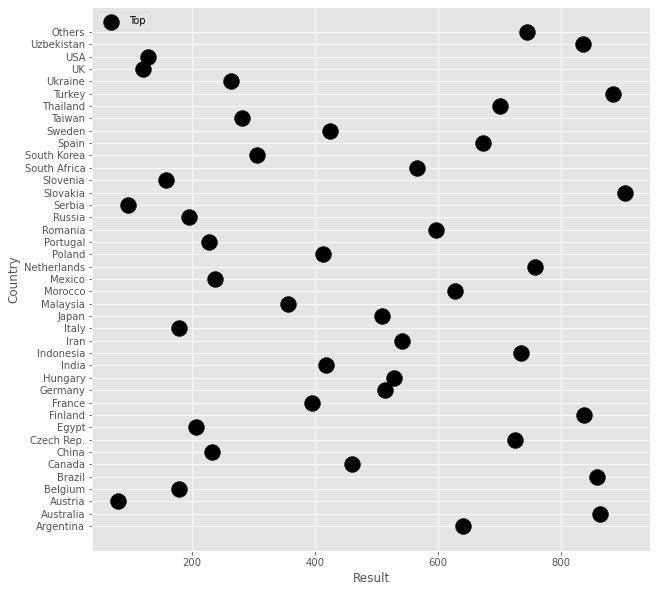

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (10,10)
plt.style.use('ggplot')
plt.style.context('darkgrid')
ax = motor.plot.scatter(x='Result', y='Country', color='black',label='Top', marker='o', s=250)
plt.legend(loc = 'upper left')
plt.savefig('test.png')

In [20]:
motor['Result'].describe(include=[np.number])

count     41.000000
mean     473.268293
std      257.610917
min       79.750000
25%      233.750000
50%      461.083333
75%      701.250000
max      903.833333
Name: Result, dtype: float64

In [21]:
motor.shape

(41, 9)

In [22]:
motor = pd.read_csv("data_motor.csv",usecols = ['Total','Result'])
new_motor=motor[['Total','Result']]

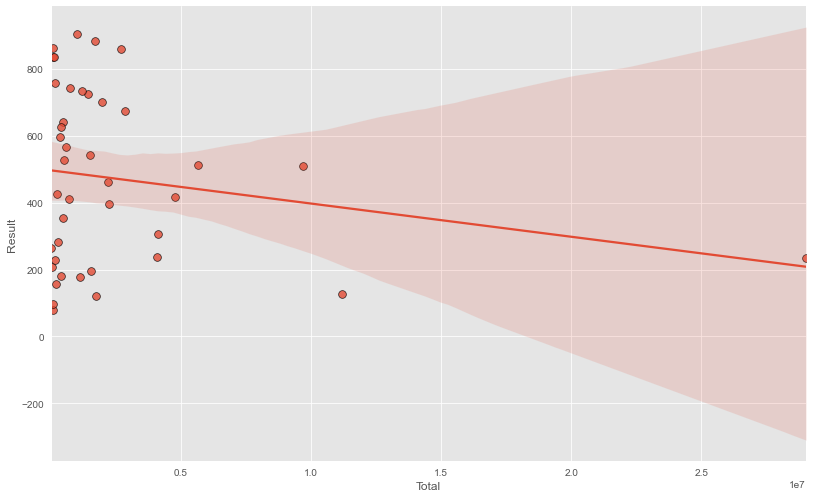

In [23]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,8)
plt.style.use('ggplot')
plt.style.context('darkgrid')
gridobj=sns.lmplot(x='Total',y='Result',data=motor,
                  height=7, aspect=1.6, robust=False, palette='husl',
                  scatter_kws=dict(s=60, linewidths=.7,edgecolors='black'))
plt.show()

In [24]:
X=new_motor.copy()

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [26]:
clusters=X.copy()
clusters['cluster_pred']=kmeans.fit_predict(X)

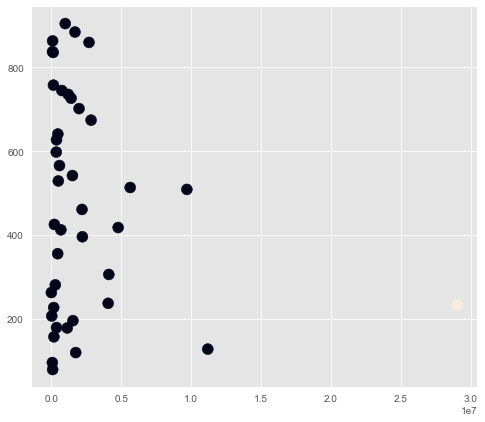

In [27]:
plt.rcParams["figure.figsize"] = (8,7)
plt.style.use('ggplot')
plt.style.context('whitegrid')
plt.scatter(clusters['Total'], clusters['Result'],c=clusters['cluster_pred'], s=120, marker='o')
plt.show()

In [28]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.39540774,  0.65821087],
       [-0.47245341,  1.53002614],
       [-0.47219599, -1.54654512],
       [-0.41459418, -1.15386799],
       [ 0.06405242,  1.51561597],
       [-0.03905639, -0.04788745],
       [ 5.49209653, -0.94131798],
       [-0.19990171,  0.99324732],
       [-0.48524025, -1.04579172],
       [-0.47390429,  1.42915495],
       [-0.03344369, -0.30366797],
       [ 0.67169297,  0.15745747],
       [-0.38855105,  0.21870069],
       [ 0.49375048, -0.21720695],
       [-0.24185165,  1.02927274],
       [-0.18022332,  0.26913628],
       [-0.25719887, -1.15747053],
       [ 1.50669133,  0.13944475],
       [-0.39788664, -0.46217984],
       [-0.41507148,  0.60417273],
       [ 0.34637742, -0.92690782],
       [-0.46035633,  1.11573376],
       [-0.35053026, -0.23882221],
       [-0.45658909, -0.96653578],
       [-0.41869681,  0.48889137],
       [-0.172819  , -1.08902223],
       [-0.47631471, -1.48169935],
       [-0.28621841,  1.69214055],
       [-0.45363784,

In [29]:
wcss=[]
for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[82.0,
 48.35698244137714,
 19.320651572630403,
 12.049614909662024,
 7.894301199567998,
 5.910337310597558,
 4.339190537695057,
 3.258413683974756,
 2.453126492826112,
 1.9567050257067207,
 1.5178731308701274,
 1.3267914765434785,
 1.1171908643153863,
 0.9419130006054492,
 0.7815932415055522,
 0.6016924197243625,
 0.5156739424642589,
 0.4297776371877702,
 0.37807134919816976,
 0.3177360001622335,
 0.2765426904299474,
 0.24025030774578746,
 0.19871446970147802,
 0.1677948319387063,
 0.13168513760348943,
 0.10486781411155732,
 0.08325573422990071,
 0.06818208726420703,
 0.05665362366250417]

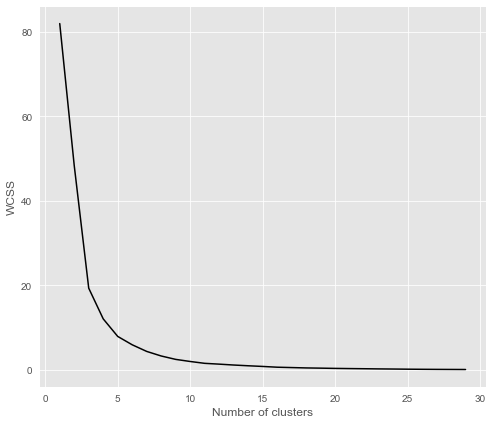

In [30]:
plt.rcParams["figure.figsize"] = (8,7)
plt.style.use('ggplot')
plt.style.context('whitegrid')
plt.plot(range(1,30),wcss,color='black')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans_new = KMeans(4)
kmeans.fit(X_scaled)
cluster_new=X.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(X_scaled)
cluster_new

,Total,Result,cluster_pred
0,472158,640.750000,1
1,98632,862.583333,1
2,99880,79.750000,0
3,379140,179.666667,0
4,2699672,858.916667,1
5,2199789,461.083333,0
6,29015434,233.750000,3
7,1419993,726.000000,1
8,36640,207.166667,0
9,91598,836.916667,1


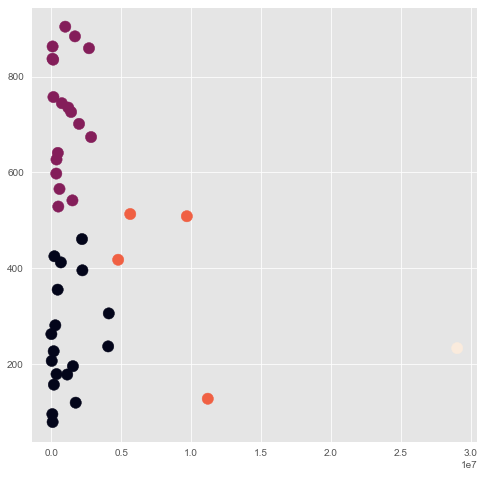

In [32]:
plt.rcParams["figure.figsize"] = (8,8)
plt.style.use('ggplot')
plt.style.context('whitegrid')
plt.scatter(cluster_new['Total'], cluster_new['Result'],c=cluster_new['cluster_pred'], s=127, marker='o')
plt.show()